# Corrected gaussian smoothing
Gaussian smoothing was applied only once using scipy's `gaussian_filter()` which is multidimensional 1D smoothing. Prior to gaussian smoothing, the images had to be made continuous as ~2.67% of the total grid points were sampled 126 times. For that, interpolation was done by taking the mean of the nearest neighbor (k=10) as this was not only substantially fast but its results were very similar to convolving with circle (aka the original method of taking means of convolving circle). The convolution method was not even possible on ML posterior due to the time complexity. Subsequently, the posterior images were resized to apply the same gaussian filter on both ML models and human response. It was important to reshape the vectorized posterior to a square matrix to allow for multidimensional 1D smoothing.

In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

cmap = 'PRGn'

In [3]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\TrainedCLF.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\EstimatedData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\HellingerData.pickle ] loaded
Size of the S-XOR: (6322,)                    
Size of the Spiral: (6276,)                    
Size of the whole dataset: (12598, 7)

Size of the S-XOR after adding hellinger: (6322, 8)            
Size of the Spiral after adding hellinger: (6276, 8)


In [4]:
ib.load_sampledData()

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SampledData.pickle ] loaded


## Time and Date of the experiment

In [5]:
print(ib.date)

2021-04-20 03:49:50.070434


In [6]:
uX = ib.mask
uX0, uX1 = uX[:,0], uX[:,1]
uXh = np.column_stack([ib.human[0][:,3], ib.human[0][:,5]])
uXh0, uXh1 = ib.human[0][:,3], ib.human[0][:,5]
label = ib.mtype[:3] + ['Human'] #excluding QDA
fsize= 18

## Testing few cases of estimated posteriors of ML models and human predictions

Human S-XOR

In [7]:
temp = np.column_stack([ib.human[1][:,3], ib.human[1][:,5], ib.human[1][:,0]])
xy, original, down, alls = ib.smooth_gaussian_distance(temp, radius=0.2, step=0.01, method='mean', sigma=1, k=10)

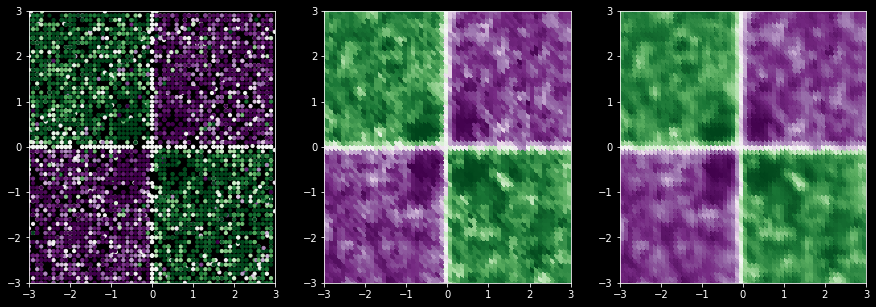

In [8]:
plt.style.use('dark_background')

fig, axs = plt.subplots(1,3,figsize=(5*3,5))

axs[0].scatter(x=original[:,0], y=original[:,1],c=original[:,2],cmap=cmap, s=10)
axs[1].scatter(x=np.array(xy)[:,0], y=np.array(xy)[:,1],c=down,cmap=cmap)
axs[2].scatter(x=np.array(xy)[:,0], y=np.array(xy)[:,1],c=alls,cmap=cmap)
for i in range(3):
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])

Human Spiral

In [16]:
temp = np.column_stack([ib.human[0][:,3], ib.human[0][:,5], ib.human[0][:,0]])
xy, original, down, alls = ib.smooth_gaussian_distance(temp, radius=0.2, step=0.01, method='mean', sigma=1, k=10)

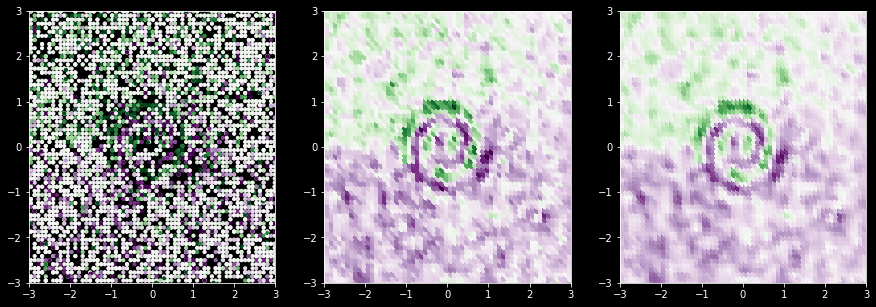

In [17]:
plt.style.use('dark_background')

fig, axs = plt.subplots(1,3,figsize=(5*3,5))

axs[0].scatter(x=original[:,0], y=original[:,1],c=original[:,2],cmap=cmap, s=10)
axs[1].scatter(x=np.array(xy)[:,0], y=np.array(xy)[:,1],c=down,cmap=cmap)
axs[2].scatter(x=np.array(xy)[:,0], y=np.array(xy)[:,1],c=alls,cmap=cmap)
for i in range(3):
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])

SVM Spiral

In [12]:
temp = ib.estpst_sample[0][0]
temp = ib.pointwise_gridAverage(temp).to_numpy()
xy, original, down, alls = ib.smooth_gaussian_distance(temp, radius=0.2, step=0.01, method='mean', sigma=1, k=10)

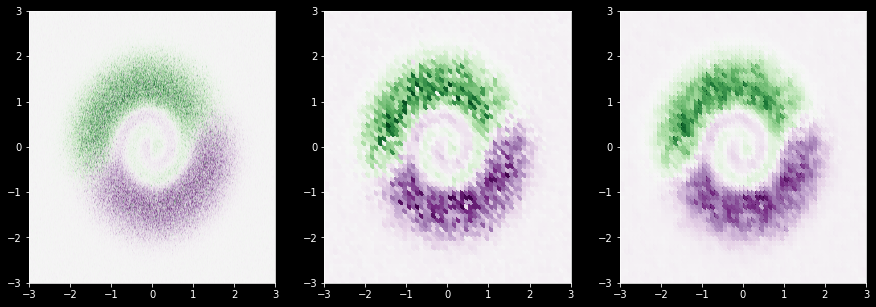

In [13]:
plt.style.use('dark_background')

fig, axs = plt.subplots(1,3,figsize=(5*3,5))

axs[0].scatter(x=original[:,0], y=original[:,1],c=original[:,2],cmap=cmap, s=10)
axs[1].scatter(x=np.array(xy)[:,0], y=np.array(xy)[:,1],c=down,cmap=cmap)
axs[2].scatter(x=np.array(xy)[:,0], y=np.array(xy)[:,1],c=alls,cmap=cmap)
for i in range(3):
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])

MLP Spiral

In [14]:
temp = ib.estpst_sample[0][1]
temp = ib.pointwise_gridAverage(temp).to_numpy()
xy, original, down, alls = ib.smooth_gaussian_distance(temp, radius=0.2, step=0.01, method='mean', sigma=1, k=10)

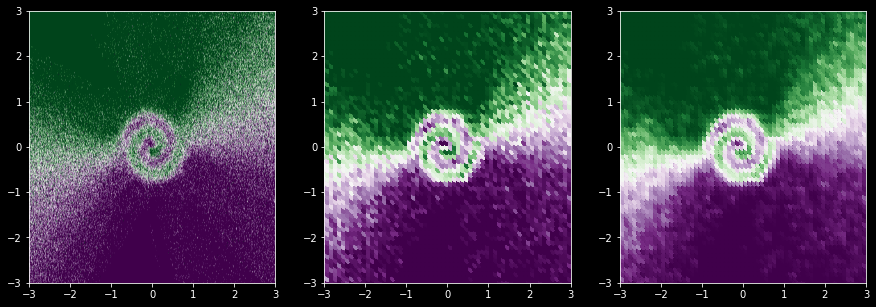

In [15]:
plt.style.use('dark_background')

fig, axs = plt.subplots(1,3,figsize=(5*3,5))

axs[0].scatter(x=original[:,0], y=original[:,1],c=original[:,2],cmap=cmap, s=10)
axs[1].scatter(x=np.array(xy)[:,0], y=np.array(xy)[:,1],c=down,cmap=cmap)
axs[2].scatter(x=np.array(xy)[:,0], y=np.array(xy)[:,1],c=alls,cmap=cmap)
for i in range(3):
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])

## Comprehensive figure for comparing original, resampled, and resampled and gaussian filter applied images between ML models and human prediction

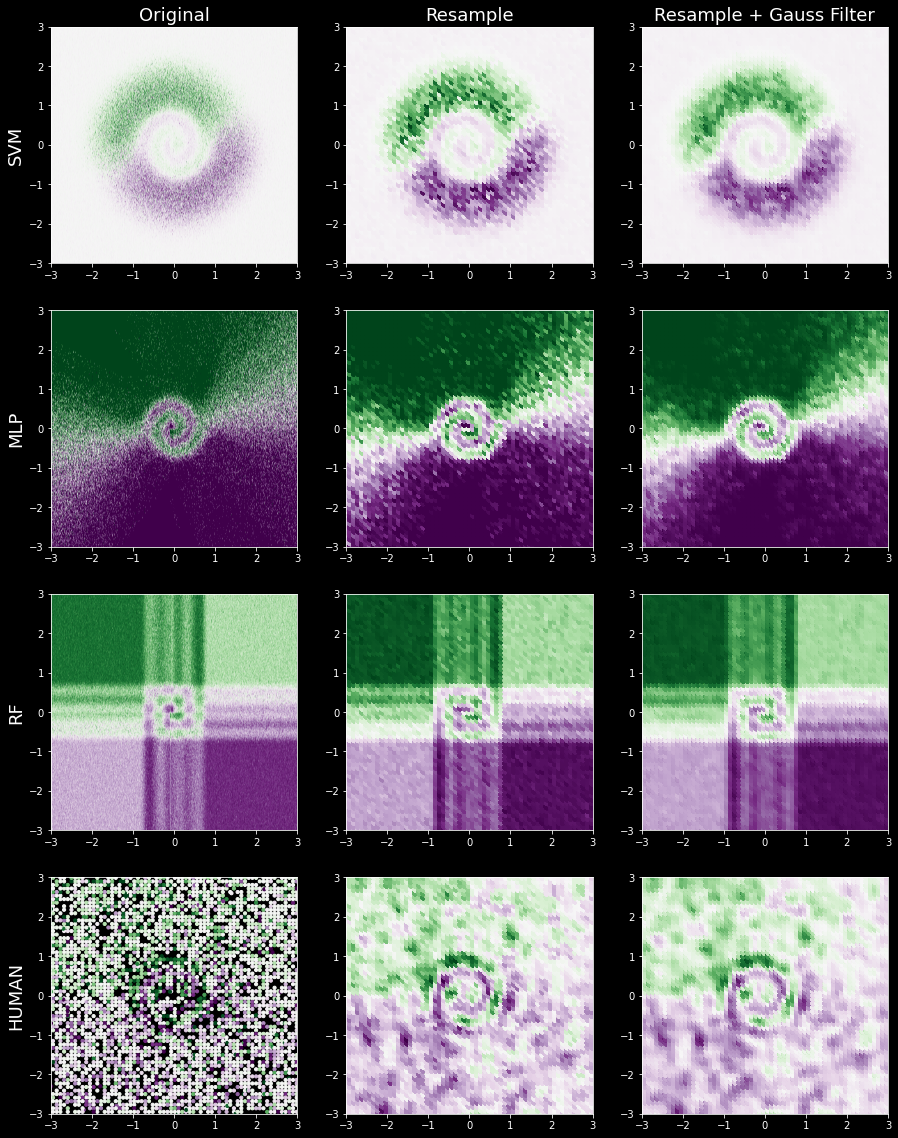

In [24]:
mtypes = ib.mtype[:3] + ['HUMAN']
m = len(mtypes)

fig, axs = plt.subplots(m,3,figsize=(5*3,5*m))

for i, mtype in enumerate(mtypes):
    if i == 3:
        mtype_i = np.column_stack([ib.human[0][:,3], ib.human[0][:,5], ib.human[0][:,0]])        
    else:
        mtype_i = ib.estpst_sample[0][i]
        
    mtype_i = ib.pointwise_gridAverage(mtype_i).to_numpy()
    xy, original, down, alls = ib.smooth_gaussian_distance(mtype_i, step=0.01, method='mean', sigma=1, k=10)

    if i == 3:
        axs[i,0].scatter(x=original[:,0], y=original[:,1], c=original[:,2], cmap=cmap,s=10)
    else:
        axs[i,0].scatter(x=original[:,0], y=original[:,1], c=original[:,2], cmap=cmap)
    axs[i,1].scatter(x=np.array(xy)[:,0], y=np.array(xy)[:,1], c=down, cmap=cmap)
    axs[i,2].scatter(x=np.array(xy)[:,0], y=np.array(xy)[:,1], c=alls, cmap=cmap)

    for j in range(3):
        axs[i,j].set_xlim([-3,3])
        axs[i,j].set_ylim([-3,3])
        if j == 0:
            axs[i,j].set_ylabel(mtype, fontsize=fsize)
        if i == 0:
            axs[i,j].set_title(['Original', 'Resample', 'Resample + Gauss Filter'][j], fontsize=fsize)

plt.savefig(f'figs/[20210418_gaussian_smoothing_corrected]_filter_convolve_spiral_{str(ib.date.date())}.png', bbox_inches='tight')

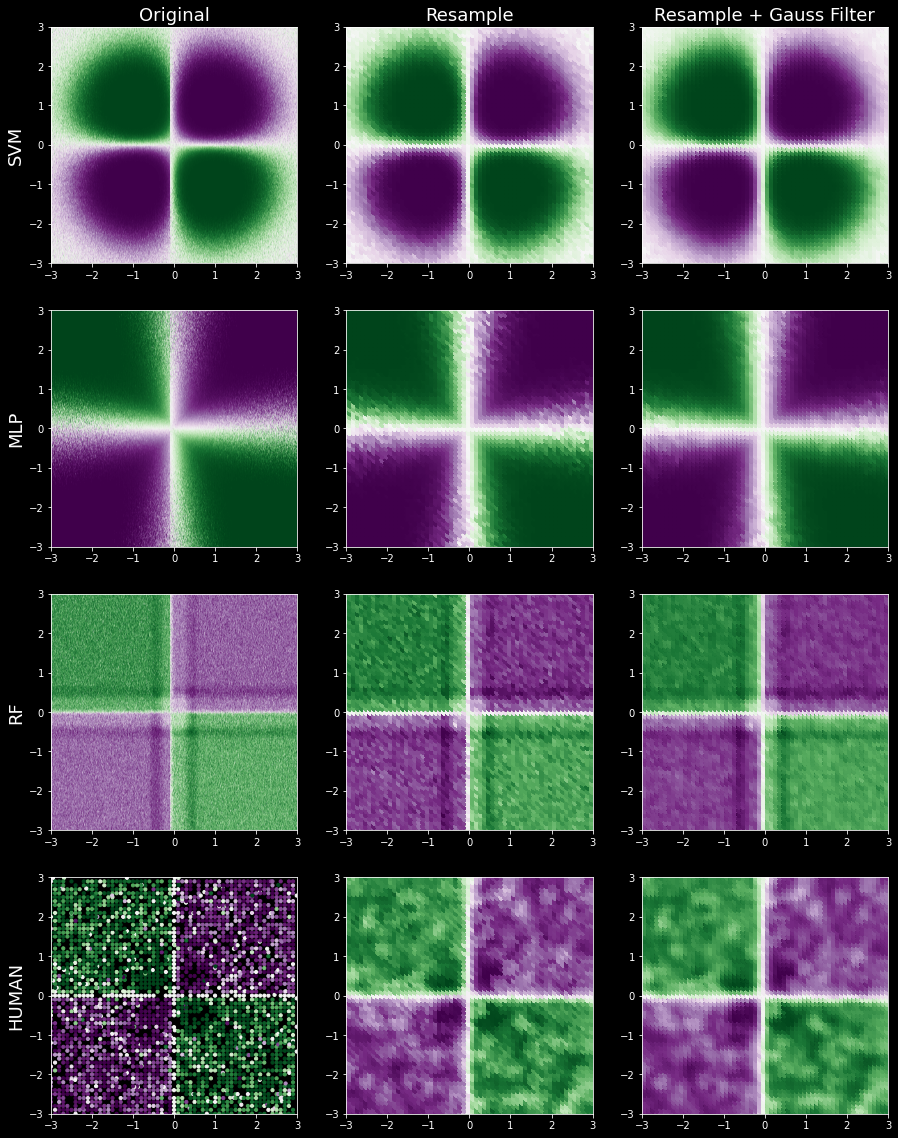

In [19]:
mtypes = ib.mtype[:3] + ['HUMAN']
m = len(mtypes)

fig, axs = plt.subplots(m,3,figsize=(5*3,5*m))

for i, mtype in enumerate(mtypes):
    if i == 3:
        mtype_i = np.column_stack([ib.human[1][:,3], ib.human[1][:,5], ib.human[1][:,0]])        
    else:
        mtype_i = ib.estpst_sample[1][i]
        
    mtype_i = ib.pointwise_gridAverage(mtype_i).to_numpy()
    xy, original, down, alls = ib.smooth_gaussian_distance(mtype_i, step=0.01, method='mean', sigma=1, k=10)

    if i == 3:
        axs[i,0].scatter(x=original[:,0], y=original[:,1], c=original[:,2], cmap=cmap,s=10)
    else:
        axs[i,0].scatter(x=original[:,0], y=original[:,1], c=original[:,2], cmap=cmap)
    axs[i,1].scatter(x=np.array(xy)[:,0], y=np.array(xy)[:,1], c=down, cmap=cmap)
    axs[i,2].scatter(x=np.array(xy)[:,0], y=np.array(xy)[:,1], c=alls, cmap=cmap)

    for j in range(3):
        axs[i,j].set_xlim([-3,3])
        axs[i,j].set_ylim([-3,3])
        if j == 0:
            axs[i,j].set_ylabel(mtype, fontsize=fsize)
        if i == 0:
            axs[i,j].set_title(['Original', 'Resample', 'Resample + Gauss Filter'][j], fontsize=fsize)

plt.savefig(f'figs/[20210418_gaussian_smoothing_corrected]_filter_convolve_sxor_{str(ib.date.date())}.png', bbox_inches='tight')

## Heatmap experiment
Turns out plotting a heatmap is substantially faster than plotting a scatter plot using matplotlib. One caveat with using heatmap is that once converted into a 2D matrix, the coordinate information is lost. Thus, heatmap should be used when the data points are ordered sequentially by its corresponding coordinates.

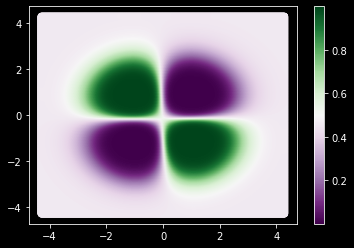

In [23]:
plt.scatter(x=uX0, y=uX1, c=ib.estpst[1][4][0], cmap='PRGn')
plt.colorbar()

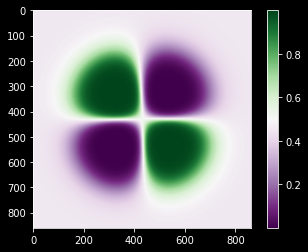

In [22]:
plt.imshow(np.flip(ib.estpst[1][4][0].reshape(860,860),axis=1), cmap='PRGn')
plt.colorbar()

## End of notebook